# Intel Image Classification

## 🔗 Veri Kümesi
Veri kümesi, [Intel Image Classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data) adresinden alınmıştır. Bu veri seti, farklı sınıflara ait görüntüleri içerir ve modelin eğitim ve test aşamalarında kullanılmak üzere düzenlenmiştir.

## 🔗 Hugging Face Uygulaması
Ayrıca, projenin etkileşimli bir versiyonu [Intel Image Classification - Hugging Face Space](https://huggingface.co/spaces/btulftma/intel-image-classification) adresinde bulunmaktadır.

## 🔗 Github
Projenin detaylı açıklması için, [Intel Image Classification](https://github.com/FBetulS/intel-image-classification)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Veri klasör yolları
train_dir = "seg_train"
test_dir = "seg_test"
pred_dir = "seg_pred"

In [5]:
# Veri artırma ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # %20 validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train ve validation generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 sınıf
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

In [8]:
# Train ve validation generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',  # Değişiklik burada
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',  # Değişiklik burada
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',  # Değişiklik burada
    shuffle=False
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Veri generatörleri
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    "seg_train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    "seg_train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # sparse loss
              metrics=['accuracy'])

# Eğitim
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.4712 - loss: 1.3387

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 214s 603ms/step - accuracy: 0.4714 - loss: 1.3381 - val_accuracy: 0.6409 - val_loss: 0.9472
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 228s 649ms/step - accuracy: 0.6545 - loss: 0.9187 - val_accuracy: 0.6869 - val_loss: 0.8249
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 133s 378ms/step - accuracy: 0.7007 - loss: 0.7976 - val_accuracy: 0.7318 - val_loss: 0.7036
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 146s 415ms/step - accuracy: 0.7252 - loss: 0.7390 - val_accuracy: 0.7386 - val_loss: 0.7065
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 113s 323ms/step - accuracy: 0.7327 - loss: 0.7076 - val_accuracy: 0.7771 - val_loss: 0.6326
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 113s 322ms/step - accuracy: 0.7591 - loss: 0.6582 - val_accuracy: 0.7693 - val_loss: 0.6503
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 111s 316ms/step - accuracy: 0.7646 - loss: 0.6438 - val_accuracy: 0.7746 - val_loss: 0.6244
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 114s 324ms/step - accuracy: 0.7817 - loss: 0.60

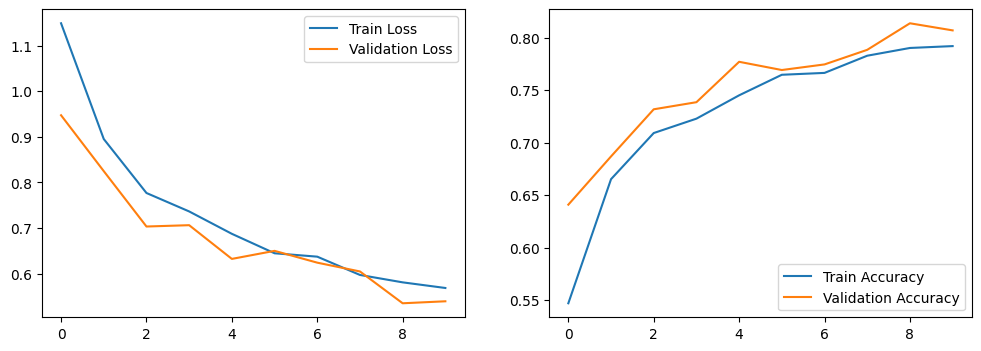

94/94 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.8709 - loss: 0.3774
Test Accuracy: 84.80%


In [11]:
# Loss ve Accuracy Grafikleri
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()

# Test Seti Değerlendirme
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

In [12]:
model.save("intel_image_classifier.h5")